# Simple MNIST multiclass classification (using CNN)

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

from neuralnetlib.activations import ReLU, Softmax
from neuralnetlib.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation, AveragePooling2D
from neuralnetlib.losses import CategoricalCrossentropy
from neuralnetlib.model import Model
from neuralnetlib.optimizers import Adam
from neuralnetlib.preprocessing import one_hot_encode
from neuralnetlib.metrics import accuracy_score, f1_score, recall_score

## 1. Loading a dataset (in this case, MNIST)

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 2. Preprocessing

In [3]:
x_train = x_train.reshape(-1, 1, 28, 28) / 255.0  # Normalization and reshaping of the images for CNN
x_test = x_test.reshape(-1, 1, 28, 28) / 255.0  # Normalization and reshaping of the images for CNN
y_train = one_hot_encode(y_train, num_classes=10)  # One-hot encoding of the labels
y_test = one_hot_encode(y_test, num_classes=10)  # One-hot encoding of the labels

## 3. Model definition

In [4]:
model = Model()
model.add(Input(input_shape=(1, 28, 28)))
model.add(Conv2D(filters=4, kernel_size=2, random_state=42))
model.add(Activation(ReLU()))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=8, kernel_size=2, random_state=42))
model.add(Activation(ReLU()))
model.add(AveragePooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, random_state=42))
model.add(Activation(ReLU()))
model.add(Dense(10, random_state=42, activation="softmax"))  # Yeah, you can also use strings for the activation functions, or directly the class

"""
    Side note: if you set the following:
    
        - filters to 8 and 16 (in this order)
        - padding of the Conv2D layers to 'same'
        - weights initialization to 'he'
    
    you'll get an accuracy of ~0.9975 which is actually pretty cool
"""

"\n    Side note: if you set the following:\n    \n        - filters to 8 and 16 (in this order)\n        - padding of the Conv2D layers to 'same'\n        - weights initialization to 'he'\n    \n    you'll get an accuracy of ~0.9975 which is actually pretty cool\n"

## 4. Model compilation

In [5]:
model.compile(loss_function="cce", optimizer="adam")  # You can also use strings for the loss function and the optimizer

model.summary()

Model
-------------------------------------------------
Layer 1: Input(input_shape=(1, 28, 28))
Layer 2: Conv2D(num_filters=4, kernel_size=(2, 2), stride=(1, 1), padding=valid)
Layer 3: Activation(ReLU)
Layer 4: MaxPooling2D(pool_size=(2, 2), stride=(2, 2), padding=valid)
Layer 5: Conv2D(num_filters=8, kernel_size=(2, 2), stride=(1, 1), padding=valid)
Layer 6: Activation(ReLU)
Layer 7: AveragePooling2D(pool_size=(2, 2), stride=(2, 2), padding=valid)
Layer 8: Flatten
Layer 9: Dense(units=64)
Layer 10: Activation(ReLU)
Layer 11: Dense(units=10)
Layer 12: Activation(Softmax)
-------------------------------------------------
Loss function: CategoricalCrossentropy
Optimizer: Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
-------------------------------------------------


## 5. Model training

In [6]:
model.fit(x_train, y_train, epochs=10, batch_size=128, metrics=[
            "accuracy"], random_state=42, validation_data=(x_test, y_test))

[==============================] 100% Epoch 1/10 - loss: 0.7200 - accuracy: 0.7635 - 15.83s - val_accuracy: 0.8955
[==============================] 100% Epoch 2/10 - loss: 0.3133 - accuracy: 0.9008 - 16.39s - val_accuracy: 0.9168
[==============================] 100% Epoch 3/10 - loss: 0.2532 - accuracy: 0.9204 - 16.10s - val_accuracy: 0.9295
[==============================] 100% Epoch 4/10 - loss: 0.2167 - accuracy: 0.9334 - 16.04s - val_accuracy: 0.9378
[==============================] 100% Epoch 5/10 - loss: 0.1920 - accuracy: 0.9416 - 15.89s - val_accuracy: 0.9419
[==============================] 100% Epoch 6/10 - loss: 0.1732 - accuracy: 0.9475 - 16.53s - val_accuracy: 0.9475
[==============================] 100% Epoch 7/10 - loss: 0.1574 - accuracy: 0.9524 - 15.98s - val_accuracy: 0.9501
[==============================] 100% Epoch 8/10 - loss: 0.1439 - accuracy: 0.9568 - 16.32s - val_accuracy: 0.9538
[==============================] 100% Epoch 9/10 - loss: 0.1328 - accuracy: 0.95

## 6. Model evaluation

In [7]:
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

Test loss: 0.1342540788279363


## 7. Model prediction

In [8]:
y_pred = model.predict(x_test)

## 8. Printing some metrics

In [9]:
print("accuracy:", accuracy_score(y_pred, y_test))
print("f1_score:", f1_score(y_pred, y_test))
print("recall_score", recall_score(y_pred, y_test))

accuracy: 0.9591
f1_score: 0.9591824725913856
recall_score 0.9582045343696823


## 9. Plot the first 10 test images, their predicted labels, and the true labels.

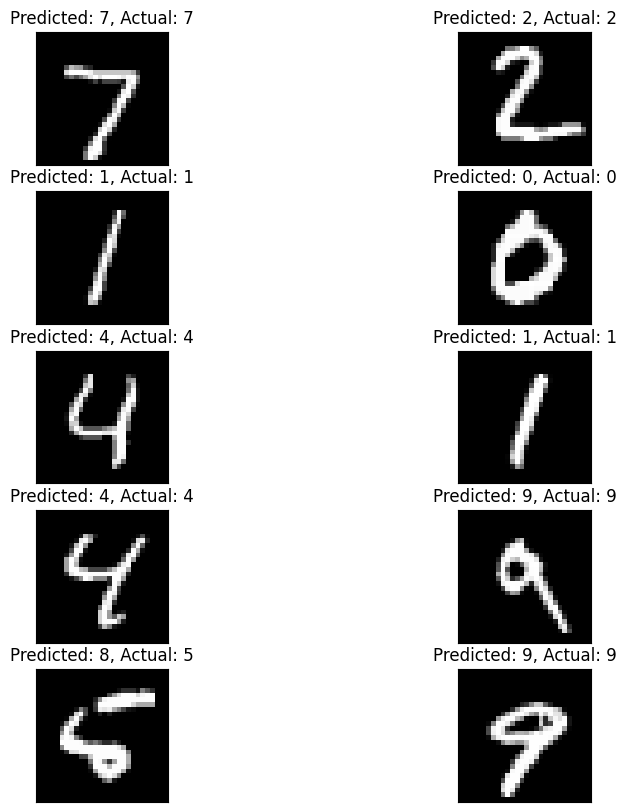

In [10]:
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    ax = fig.add_subplot(5, 2, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Predicted: {np.argmax(y_pred[i])}, Actual: {np.argmax(y_test[i])}")
plt.show()

## 10. Save the model

In [11]:
model.save("my_mnist_model.npz")